In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import *
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [18]:
img=cv2.imread("C:\\Users\\RNS\\training\\alif\\1.png")
print(img[50])

[[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]]


In [20]:
cv2.imread("C:\\Users\\RNS\\training\\alif\\1.png").shape

(100, 15, 3)

In [21]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset=train.flow_from_directory('training/',target_size=(200,200),batch_size=2,class_mode='binary')
validation_dataset=train.flow_from_directory('validation/',target_size=(200,200),batch_size=2,class_mode='binary')

NameError: name 'train' is not defined

In [68]:
train_dataset.class_indices

{'ا': 0, 'ی': 1}

In [69]:
train_dataset.classes

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [70]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])
#sigmoid for binary classification

In [71]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [72]:
model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=30,validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 3s 712ms/step - loss: 0.2358 - accuracy: 0.8333 - val_loss: 0.7536 - val_accuracy: 0.5714
Epoch 2/30
3/3 [==============================] - 1s 487ms/step - loss: 1.3450e-07 - accuracy: 1.0000 - val_loss: 0.7557 - val_accuracy: 0.5714
Epoch 3/30
3/3 [==============================] - 1s 490ms/step - loss: 2.6051e-06 - accuracy: 1.0000 - val_loss: 0.5965 - val_accuracy: 0.7143
Epoch 4/30
3/3 [==============================] - 1s 512ms/step - loss: 3.3137e-07 - accuracy: 1.0000 - val_loss: 0.5899 - val_accuracy: 0.7143
Epoch 5/30
3/3 [==============================] - 1s 522ms/step - loss: 9.3143e-06 - accuracy: 1.0000 - val_loss: 0.2633 - val_accuracy: 0.8571
Epoch 6/30
3/3 [==============================] - 1s 428ms/step - loss: 2.0605e-07 - accuracy: 1.0000 - val_loss: 0.2689 - val_accuracy: 0.8571
Epoch 7/30
3/3 [==============================] - 1s 456ms/step - loss: 2.1390e-07 - accuracy: 1.0000 - val_loss: 0.2757 - val_accuracy: 0.8

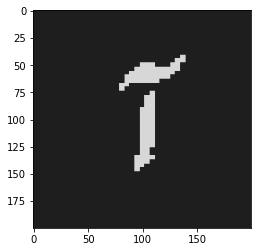

ی


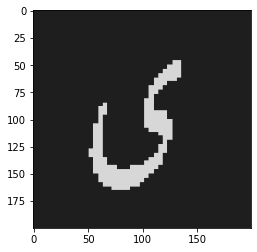

ی


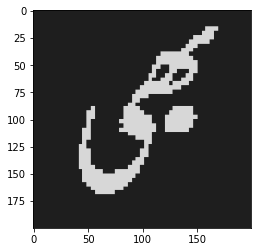

ی


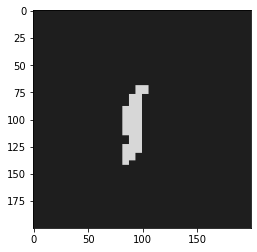

ا


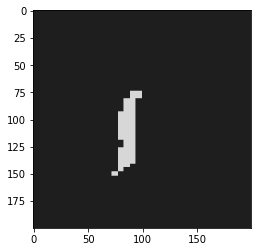

ا


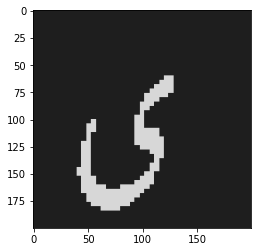

ی


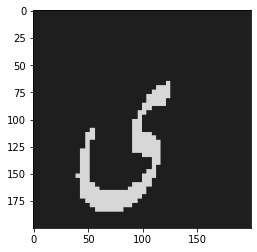

ی


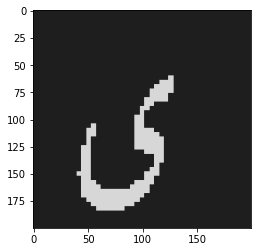

ی


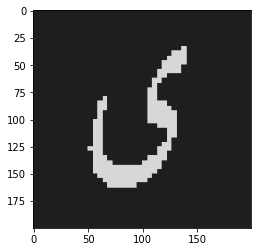

ی


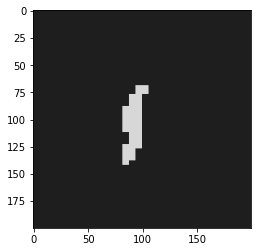

ا


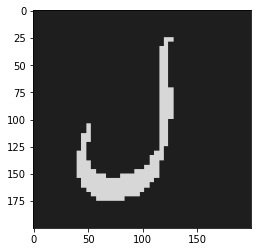

ی


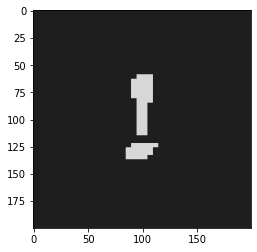

*


In [79]:
test_path='testing'
for i in os.listdir(test_path):
    img=image.load_img(test_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    predictions=model.predict(images) 
   # classes_x=np.argmax(predictions,axis=-1)
#     for p in predictions:
#         index = np.argmax(p)
#         confidence = np.max(p)
#         predicted_lig = CATEGORIES[index]
#         if confidence>0.9:
#             if predicted_lig == "ا":
#                 print("ا")
#             elif predicted_lig =="ی" :
#                 print("ی")
#             else:
#                 print("*")
    for x in predictions:
        if x==0:
            print("ا")
        elif x==1:
            print("ی")
        else:
            print("*")
    
 #   val=model.predict(images)
 #   y_prob = model.predict_classes(images) 
 #   y_classes = y_prob.argmax(axis=-1)
#    print(y_prob)
#     if val==0:
#         print("Alif")
#     elif val==1:
#         print("yay")
#     else:
#         print("not")
